In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("training_data.csv")

print(data.head())
print(data.describe())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [3]:
X = data.iloc[:, [0]].values
Y = data.iloc[:, 1].values

if np.isnan(Y).sum() > 0:
    print(f"FOUND {np.isnan(Y).sum()} VALUES IN Y")
    
    mask = ~np.isnan(Y)
    
    X = X[mask]
    Y = Y[mask]
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

FOUND 1 VALUES IN Y


In [4]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

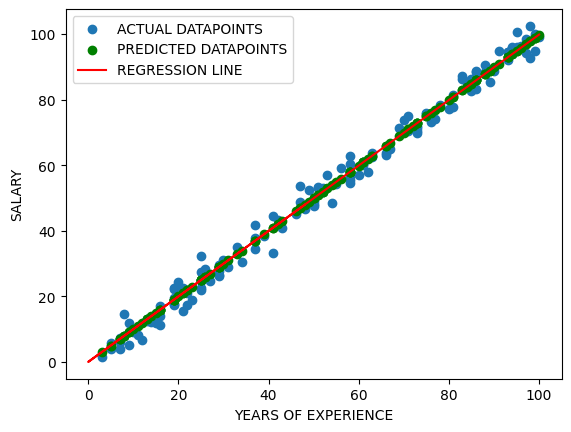

In [8]:
plt.scatter(X_test, Y_test, label = 'ACTUAL DATAPOINTS')
plt.scatter(X_test, Y_pred, label = 'PREDICTED DATAPOINTS', c = 'green')
plt.plot(X_train, model.predict(X_train), label='REGRESSION LINE', color = 'red')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.legend()
plt.show()

In [9]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MEAN SQUARED ERROR: {mse}")
print(f"R^2 SCORE: {r2}")

MEAN SQUARED ERROR: 7.551490700376486
R^2 SCORE: 0.9916592070219102
